# Supply Chain analytics

In [1]:
#importing modules for data visualisation and analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

## Data reading

In [2]:
#data reading
dataset = pd.read_excel('DataCoSupplyChainDataset.xls',encoding = 'unicode_escape')
dataset.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-03-02 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [24]:
#checking for null values
dataset.isnull().sum()

Type                                 0
Days for shipping (real)             0
Days for shipment (scheduled)        0
Benefit per order                    0
Sales per customer                   0
Delivery Status                      0
Late_delivery_risk                   0
Category Id                          0
Category Name                        0
Customer City                        0
Customer Country                     0
Customer Email                       0
Customer Fname                       0
Customer Id                          0
Customer Lname                       0
Customer Password                    0
Customer Segment                     0
Customer State                       0
Customer Street                      0
Customer Zipcode                     0
Department Id                        0
Department Name                      0
Latitude                             0
Longitude                            0
Market                               0
Order City               

In [25]:
#dropping unnecessary columns
dataset.drop(columns=['Product Description','Order Zipcode','Customer Zipcode'], inplace = True)

In [63]:
#checking for unique values 
categorical_variables = [ c for c in dataset.columns if dataset[c].dtype =='O']
for names in categorical_variables:
    print(names)
    print(dataset[names].nunique())

Type
4
Delivery Status
4
Category Name
41
Customer City
555
Customer Country
2
Customer Email
1
Customer Fname
629
Customer Lname
1031
Customer Password
1
Customer Segment
3
Customer State
44
Customer Street
4814
Department Name
11
Market
5
Order City
2422
Order Country
143
order date (DateOrders)
10456
Order Region
23
Order State
854
Order Status
9
Product Image
90
Product Name
90
Shipping Mode
4
Day of week
7


## Exploratory Data Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

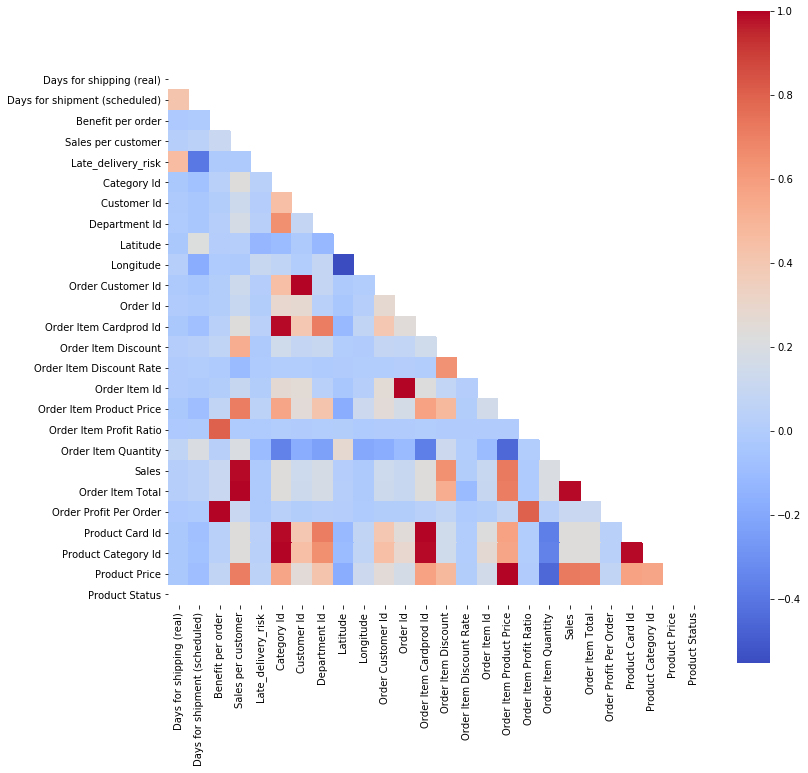

In [26]:
#checking correlation between numeric variables
numerical_variables = [ c for c in dataset.columns if dataset[c].dtypes != 'O']
fig, ax = plt.subplots(figsize = (12,12))
matrix = np.triu(dataset[numerical_variables].corr())

#constructing a heatmap
ax  = sns.heatmap(dataset[numerical_variables].corr(), cmap= 'coolwarm',square=True , mask=matrix)
plt.show()

In [28]:
'''Performing ABC analysis to discover which Products, Customers, Regions, Days, State and Hours 
contribute to 80% of the sales'''


#Grouping by product name
df1 = dataset.groupby(['Product Name']).sum()

#sorting by sales
df1 = df1.sort_values('Sales', ascending =False)

#constructing the cumulative column
df1['CUMULATIVE'] = df1['Sales'].cumsum(axis = 0)
df1 = df1.reset_index()

In [29]:
#ABC Analysis
x = df1['CUMULATIVE'].iloc[-1]

def ABC_category(value):
    if value > 0 and value < 0.8*x:
        return 'A'
    elif value >= 0.8*x and value < 0.95*x:
        return 'B'
    else:
        return 'C'
    
df1['CATEGORY'] = df1['CUMULATIVE'].apply(ABC_category)
df1['CATEGORY'].value_counts()

C    63
B    21
A     6
Name: CATEGORY, dtype: int64

In [31]:
#Finding the most Important items which make up 80% of the sales 
df1[['Product Name','Sales']].loc[df1['CATEGORY'] == 'A']

,Product Name,Sales
0,Perfect Fitness Perfect Rip Deck,656710.549611
1,Nike Men's Free 5.0+ Running Shoe,567243.270861
2,Nike Men's Dri-FIT Victory Golf Polo,477000.000000
3,Diamondback Women's Serene Classic Comfort Bi,377374.853838
4,Nike Men's CJ Elite 2 TD Football Cleat,271939.091506
5,Field & Stream Sportsman 16 Gun Fire Safe,236788.166512


In [32]:
#carrying out a similar approach for customer id's and regions
df2 = dataset.groupby(['Customer Id']).sum()
df2 = df2.sort_values('Sales', ascending =False)
df2['CUMULATIVE'] = df2['Sales'].cumsum(axis = 0)
df2 = df2.reset_index()
x = df2['CUMULATIVE'].iloc[-1]
df2['CATEGORY'] = df2['CUMULATIVE'].apply(ABC_category)
df2['CATEGORY'].value_counts()

A    3791
B    1887
C    1549
Name: CATEGORY, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

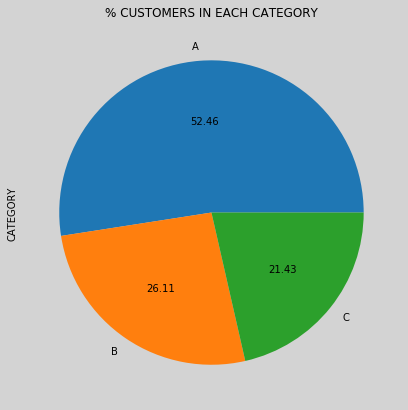

In [33]:
fig, ax = plt.subplots(figsize = (10,7))
df2['CATEGORY'].value_counts().plot.pie(autopct='%.2f',title='% CUSTOMERS IN EACH CATEGORY')
fig.set_facecolor('lightgrey')
plt.show()

In [34]:
#Finding the most Important Customers which make up 80% of the sales 

df2[['Customer Id','Sales']].loc[df2['CATEGORY'] == 'A']

,Customer Id,Sales
0,633,3253.760063
1,8380,2979.790081
2,10529,2929.720093
3,1503,2909.810059
4,6316,2895.770061
...,...,...
3786,19450,327.750000
3787,19467,327.750000
3788,19442,327.750000
3789,19390,327.750000


In [39]:
#grouping by region
df3 = dataset.groupby(['Order Region']).sum()
df3 = df3.sort_values('Sales', ascending =False)
df3['CUMULATIVE'] = df3['Sales'].cumsum(axis = 0)
df3 = df3.reset_index()
x = df3['CUMULATIVE'].iloc[-1]
df3['CATEGORY'] = df3['CUMULATIVE'].apply(ABC_category)
df3['CATEGORY'].value_counts()

A    10
C     7
B     6
Name: CATEGORY, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

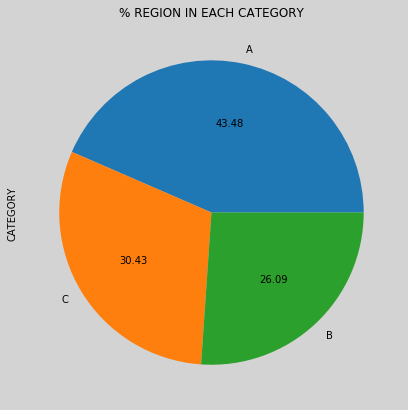

In [41]:
fig, ax = plt.subplots(figsize = (10,7))
df3['CATEGORY'].value_counts().plot.pie(autopct='%.2f',title='% REGION IN EACH CATEGORY')
fig.set_facecolor('lightgrey')
plt.show()

In [42]:
#Finding the most Important Regions which make up 80% of the sales 
df3[['Order Region','Sales']].loc[df3['CATEGORY'] == 'A']

,Order Region,Sales
0,Western Europe,642688.051093
1,Central America,470041.668029
2,South America,259620.054193
3,Southern Europe,227992.194141
4,Northern Europe,227658.864084
5,Oceania,206638.963442
6,Southeast Asia,199213.502933
7,South Asia,163941.342455
8,Eastern Asia,156498.252688
9,Caribbean,133093.982363


In [47]:
#converting columns to date-time format
df4 = dataset
df4['shipping date (DateOrders)'] = pd.to_datetime(dataset['shipping date (DateOrders)'])
df4['Day of week'] = df4['shipping date (DateOrders)'].dt.day_name()
df4['Hour'] = df4['shipping date (DateOrders)'].dt.hour

<IPython.core.display.Javascript object>

In [48]:
#discovering the days when maximum orders are placed

#grouping by day of week
df4 = df4.groupby(['Day of week']).sum()

#sorting
df4 = df4.sort_values('Sales', ascending =False)

#constructing the 'cumulative' column
df4['CUMULATIVE'] = df4['Sales'].cumsum(axis = 0)
df4 = df4.reset_index()
x = df4['CUMULATIVE'].iloc[-1]

#applying categories using the function created earlier
df4['CATEGORY'] = df4['CUMULATIVE'].apply(ABC_category)
df4['CATEGORY'].value_counts()

A    5
C    1
B    1
Name: CATEGORY, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

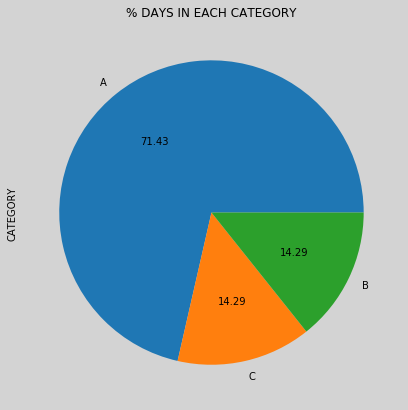

In [51]:
fig, ax = plt.subplots(figsize = (10,7))
df4['CATEGORY'].value_counts().plot.pie(autopct='%.2f',title='% DAYS IN EACH CATEGORY')
fig.set_facecolor('lightgrey')
plt.show()

In [52]:
#Finding the most important Day which make up 80% of the sales
df4[['Day of week','Sales']].loc[df4['CATEGORY'] == 'A']

,Day of week,Sales
0,Saturday,511822.558364
1,Tuesday,500269.938507
2,Monday,500157.248748
3,Wednesday,493740.718257
4,Friday,470963.668419


In [53]:
#discovering the hours when maximum orders are placed
df5 = dataset
df5['shipping date (DateOrders)'] = pd.to_datetime(dataset['shipping date (DateOrders)'])
df5['Day of week'] = df5['shipping date (DateOrders)'].dt.day_name()
df5['Hour'] = df5['shipping date (DateOrders)'].dt.hour

df5 = df5.groupby(['Hour']).sum()
df5 = df5.sort_values('Sales', ascending =False)

df5['CUMULATIVE'] = df5['Sales'].cumsum(axis = 0)
df5 = df5.reset_index()

x = df5['CUMULATIVE'].iloc[-1]
df5['CATEGORY'] = df5['CUMULATIVE'].apply(ABC_category)
df5['CATEGORY'].value_counts()

<IPython.core.display.Javascript object>

A    18
B     4
C     2
Name: CATEGORY, dtype: int64

In [54]:
#Finding the most important Hour which make up 80% of the sales
df5[['Hour','Sales']].loc[df5['CATEGORY'] == 'A']

,Hour,Sales
0,15,161012.332941
1,5,157198.772653
2,21,155011.272832
3,23,149244.612685
4,0,149019.092494
5,2,148892.762642
6,16,146938.912517
7,12,146771.462336
8,3,144541.762570
9,18,143579.572275


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

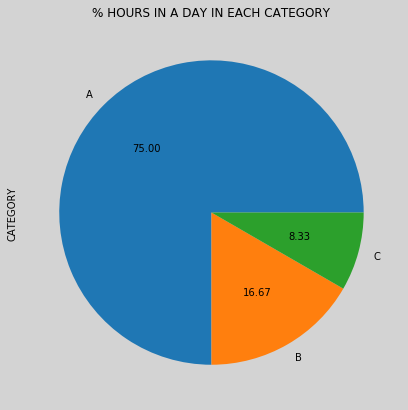

In [56]:
fig, ax = plt.subplots(figsize = (10,7))
df5['CATEGORY'].value_counts().plot.pie(autopct='%.2f',title='% HOURS IN A DAY IN EACH CATEGORY')
fig.set_facecolor('lightgrey')
plt.show()

In [27]:
#Grouping by Customer State

dfcs = dataset.groupby('Customer State').sum()

#Sorting and constructing column for cumulative values

dfcs = dfcs.sort_values('Sales',ascending=False)
dfcs['CUMULATIVE'] = dfcs['Sales'].cumsum(axis = 0)
dfcs = dfcs.reset_index()
x = dfcs['CUMULATIVE'].iloc[-1]

In [29]:
dfcs['CATEGORY'] = dfcs['CUMULATIVE'].apply(ABC_category)
dfcs['CATEGORY'].value_counts()

C    22
B    15
A     7
Name: CATEGORY, dtype: int64

In [30]:
#Finding the most Important States which make up 80% of the sales volume

dfcs= dfcs[['Customer State','CATEGORY']]
dfcs.loc[dfcs['CATEGORY'] == 'A']

,Customer State,CATEGORY
0,PR,A
1,CA,A
2,NY,A
3,TX,A
4,IL,A
5,FL,A
6,OH,A


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

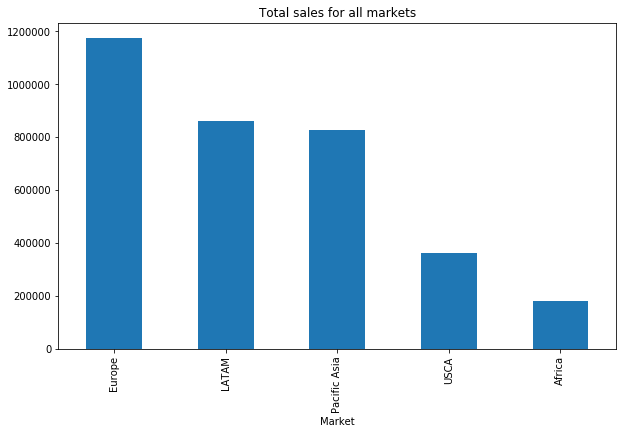

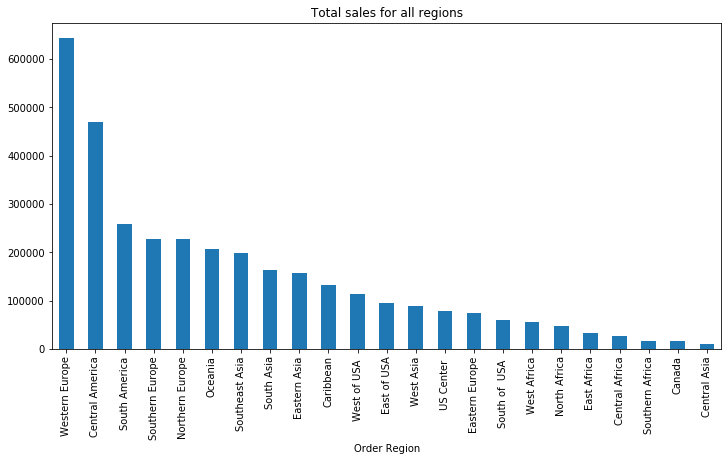

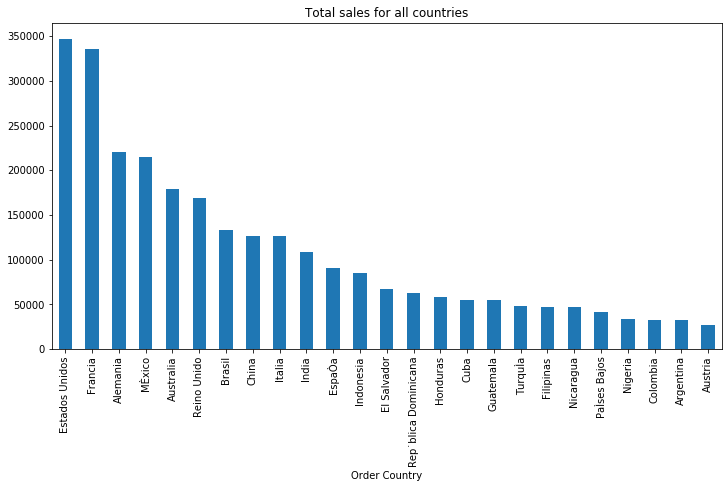

In [64]:
'''Plotting sales by market, order region, country, category and department name'''

df6 = dataset

#Grouping by market
market = df6.groupby('Market') 
#Grouping by region
region = df6.groupby('Order Region')
#Grouping by country
country = df6.groupby('Order Country')
#Grouping by category
category = df6.groupby('Category Name')
#Grouping by department
d_name = df6.groupby('Department Name')

#plotting
plt.figure(1)
market['Sales'].sum().sort_values(ascending=False).plot.bar(figsize=(10,6), title="Total sales for all markets")
plt.figure(2)
region['Sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all regions")
plt.figure(3)
country['Sales'].sum().nlargest(25).sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all countries")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

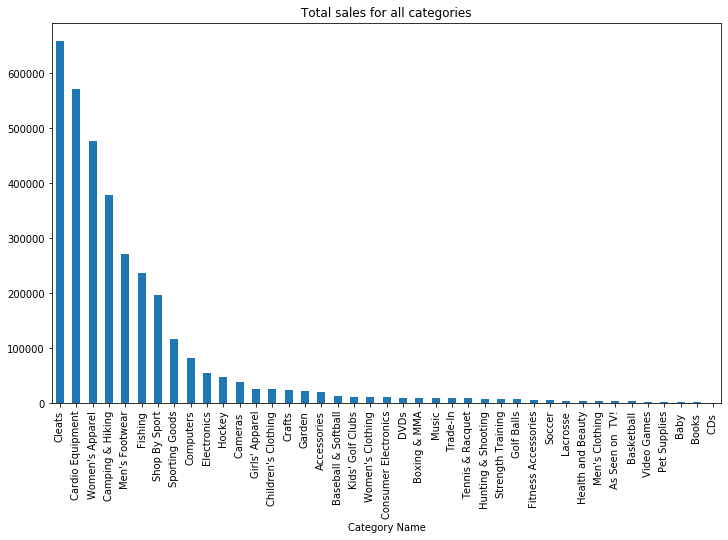

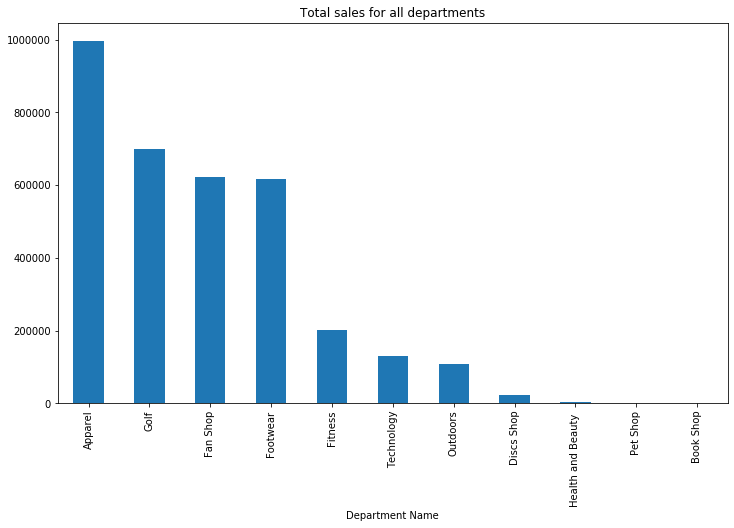

In [65]:
plt.figure(4)
category['Sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,7), title="Total sales for all categories")
plt.figure(5)
d_name['Sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,7), title="Total sales for all departments")

<IPython.core.display.Javascript object>

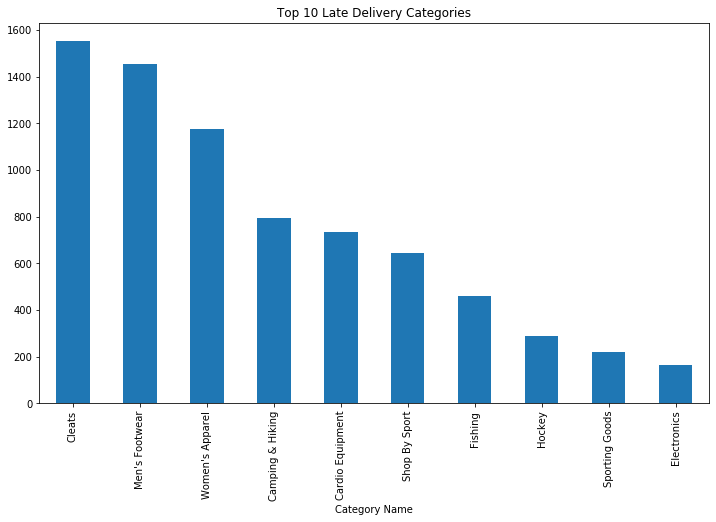

In [66]:
'''discovering 10 categories having the most late deliveries'''

df6['comp'] = df6['Days for shipping (real)'] - df6['Days for shipment (scheduled)']
plt.figure(6)
category['comp'].sum().sort_values(ascending=False).nlargest(10).plot.bar(figsize=(12,7), title="Top 10 Late Delivery Categories")

<IPython.core.display.Javascript object>

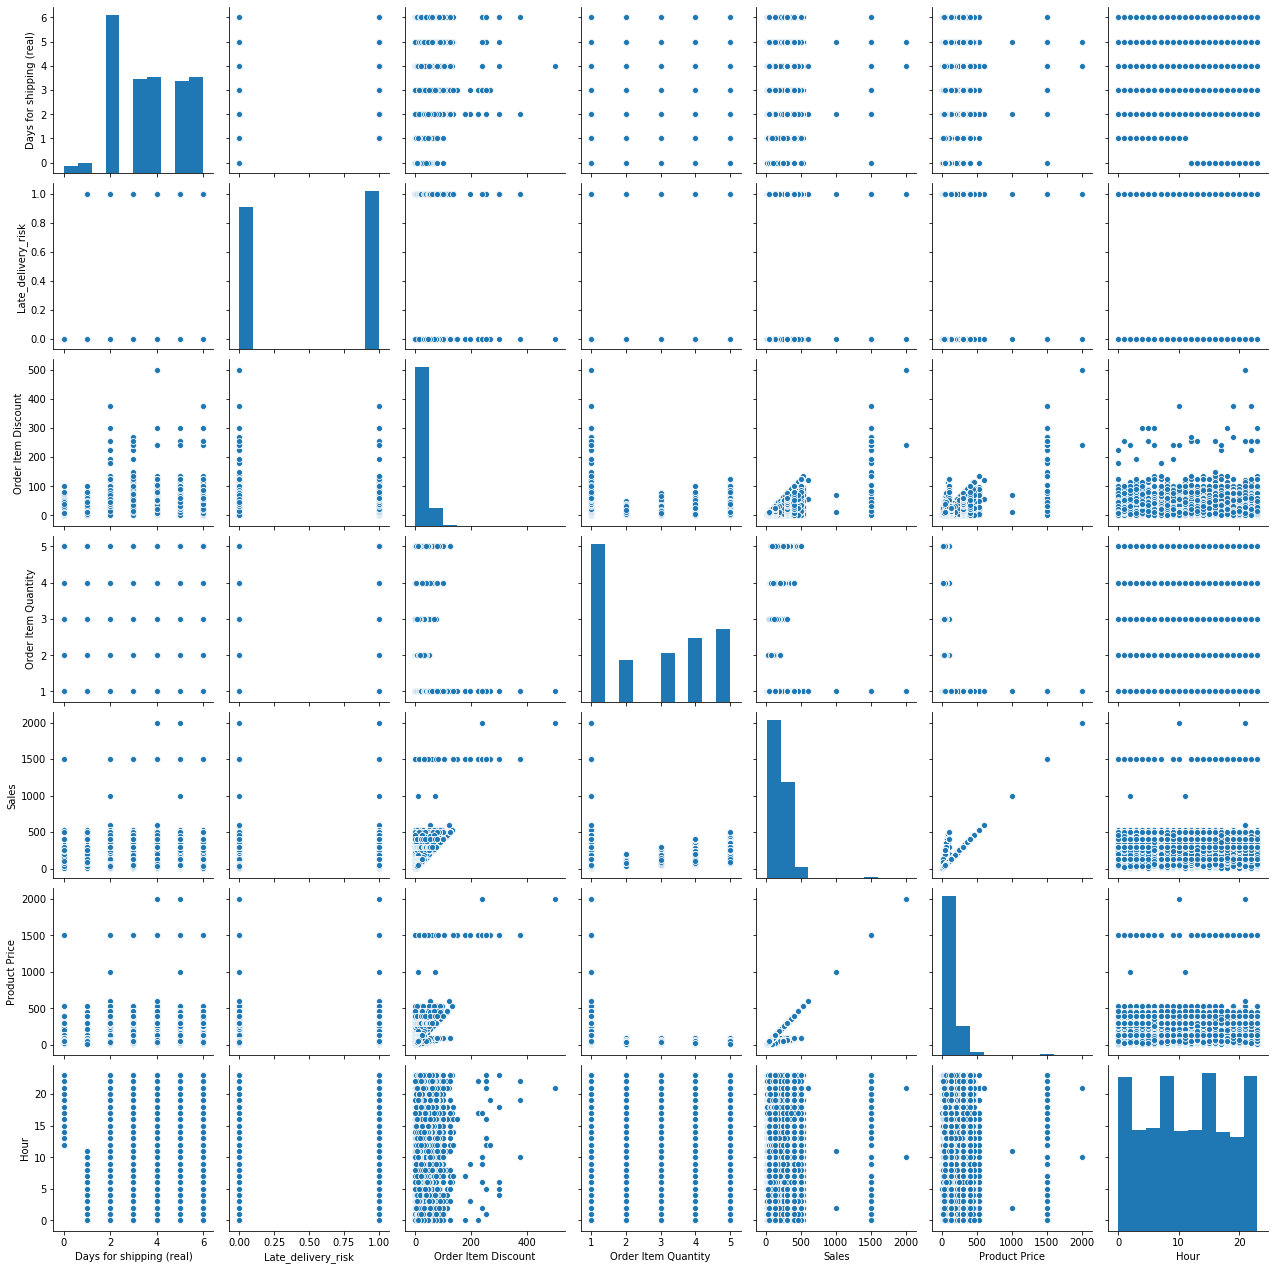

In [67]:
'''Multivariate analysis'''

# dropping certain columns before plotting multivariate analysis
df7 = dataset.drop(['Type','Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)',
        'Product Card Id','Product Category Id','Order Status','Category Id','Benefit per order','Order Profit Per Order',
              'Order Item Profit Ratio','Order Customer Id','Customer Id','Order Item Discount Rate','Department Id',
             'Order Item Cardprod Id','Order Id','Customer Zipcode','Order Item Product Price','Sales per customer','Order Item Total','Days for shipment (scheduled)','Order Item Id','comp'],axis=1)
#plotting
sns.pairplot(df7)

In [97]:
'''Finding average days taken for shipping based on Region'''

#grouping by Order Region
df8 = dataset.groupby(['Order Region']).sum()
df8 = df8.reset_index()

#making a dataframe for order region and days required for shipping
df8 = df8[['Order Region','Days for shipping (real)']]

In [98]:
df9 = dataset

#making a dataframe for order region and number of orders 
df9= df9['Order Region'].value_counts()
df9= pd.DataFrame(df9)
df9.reset_index(inplace=True)
df9.columns = ['Order Region','Number of Orders']

#merging two data frames using order region
df8 = df8.merge(df9, how='inner', on='Order Region')
df8.head()

<IPython.core.display.Javascript object>

,Order Region,Days for shipping (real),Number of Orders
0,Canada,268,78
1,Caribbean,2362,652
2,Central Africa,604,158
3,Central America,8288,2265
4,Central Asia,241,62


In [99]:
#calculating average days required for shipping

df8['Average Days for Shipping'] = df8['Days for shipping (real)']/df8['Number of Orders']
df8 = df8[['Order Region','Average Days for Shipping']]
df8

,Order Region,Average Days for Shipping
0,Canada,3.435897
1,Caribbean,3.622699
2,Central Africa,3.822785
3,Central America,3.659161
4,Central Asia,3.887097
5,East Africa,3.640719
6,East of USA,3.776340
7,Eastern Asia,3.529986
8,Eastern Europe,3.686131
9,North Africa,3.691120


## Regression Models

### Regression Models to predict days required for shipping

In [1]:
dataset = pd.read_excel("DataCoSupplyChainDataset.xls",encoding = 'unicode_escape')

<IPython.core.display.Javascript object>

In [3]:
#Importing Modules for Regression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn import utils
import statsmodels.api as sm

In [4]:
df10 = dataset
#one hot encoding for categorical variables

mrkt = pd.get_dummies(df10['Market'],drop_first=True)
cat = pd.get_dummies(df10['Category Name'],drop_first=True)

#label encoding for shipping mode
k = df10['Shipping Mode']
lab_enc = preprocessing.LabelEncoder()
k = lab_enc.fit_transform(k)
df10['Shipping Mode'] = k
s_mode = df10['Shipping Mode']

#merging categoric and numeric variables to make input dataset
x1 = pd.concat([cat,mrkt,s_mode],axis=1)
x2 = df10[['Late_delivery_risk','Order Item Quantity']]

#Assigning X and y
X= pd.concat([x1,x2],axis=1)
y = dataset['Days for shipping (real)']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
#Checking Multicollinearity of the model

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     Days for shipping (real)   R-squared:                       0.688
Model:                                  OLS   Adj. R-squared:                  0.687
Method:                       Least Squares   F-statistic:                     767.0
Date:                      Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                              11:13:23   Log-Likelihood:                -21019.
No. Observations:                     16383   AIC:                         4.213e+04
Df Residuals:                         16335   BIC:                         4.250e+04
Df Model:                                47                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [6]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Creating Pipelines for different models - Linear Regression, Decision Tree Regressor, Random Forest Regressor
pipeline_lr = Pipeline([('lrclassifier',LinearRegression())])

pipeline_dt = Pipeline([('pca2',PCA(n_components=20)),
                       ('dtclassifier',DecisionTreeRegressor())])

pipeline_rf = Pipeline([('pca3',PCA(n_components=20)),
                       ('rfclassifier',RandomForestRegressor())])

pipelines = [pipeline_lr,pipeline_dt,pipeline_rf]
pipe_dict = {0:'Linear Regression',1:'Decision Tree',2:'Random Forest'}

for pipe in pipelines:
    pipe.fit(X_train,y_train)

#Ridge Regression model

ridge = Ridge()
parameters1 = {'alpha':[15,18,19,20,21,22,23,25,26,28,29,30,35,40,42,44,46,48,50,60,70]}
ridge_regressor = GridSearchCV(ridge,parameters1,cv=5)
ridge_regressor.fit(X_train,y_train)

#Lasso Regression model

lasso = Lasso()
parameters2 = {'alpha':[1e-8,1e-3,0.001,0.005,0.01,0.05,0.5,1,5]}
lasso_regressor = GridSearchCV(lasso,parameters2,cv=5)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-08, 0.001, 0.001, 0.005, 0.01, 0.05, 0.5,
                                   1, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [7]:
#Calculating accuracy for models
prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)
prediction_linear = pipeline_lr.predict(X_test)
prediction_randomforest = pipeline_rf.predict(X_test)
prediction_decisiontree = pipeline_dt.predict(X_test)

score1 = r2_score(y_test,prediction_ridge)
score2 = r2_score(y_test,prediction_lasso)
score3 = r2_score(y_test,prediction_linear)
score4 = r2_score(y_test,prediction_randomforest)
score5 = r2_score(y_test,prediction_decisiontree)
print("Ridge Score :{} , Lasso Score :{} , Multiple Linear Regression Score :{}, Random Forest Score :{} , Decision Tree Score: {}".format(score1,score2,score3,score4,score5))

Ridge Score :0.6932218478228966 , Lasso Score :0.6931395873521161 , Multiple Linear Regression Score :0.6929312241553669, Random Forest Score :0.7157352981309435 , Decision Tree Score: 0.7064120299385701


In [9]:
print(ridge_regressor.best_params_)
print(lasso_regressor.best_params_)

{'alpha': 35}
{'alpha': 0.005}


In [10]:
#calculating Negative mean squared error of all models

rfc = RandomForestRegressor()
mse1 = cross_val_score(rfc,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse1 = np.mean(mse1)


dt = DecisionTreeRegressor()
mse2 = cross_val_score(rfc,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse2 = np.mean(mse2)


ridge_regressor = GridSearchCV(ridge,parameters1,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)


lasso_regressor = GridSearchCV(lasso,parameters2,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

#Printing Scores
print('Random Forest:', mean_mse1)
print('Decision Tree :',mean_mse2)
print('Ridge Regressor',ridge_regressor.best_score_)
print('Lasso Regressor',lasso_regressor.best_score_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest: -0.7281036526776872
Decision Tree : -0.7264263321156631
Ridge Regressor -0.7729244877773433
Lasso Regressor -0.7704184158200069


### Regression models to determine Product price

In [17]:

df11 = dataset

#constructing the input dataset

country = pd.get_dummies(df11['Order Country'],drop_first=True)
k = df11['Shipping Mode']
lab_enc = preprocessing.LabelEncoder()
k = lab_enc.fit_transform(k)
df11['Shipping Mode'] = k
s_mode = df11['Shipping Mode']
cat = pd.get_dummies(df11['Category Name'],drop_first=True)
sales = df11["Sales"]

#Assigning X and y
X = pd.concat([country,cat,sales,s_mode],axis=1)
y = df11['Product Price']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [19]:
#Creating Pipelines for models

pipeline_dt = Pipeline([('pca2',PCA(n_components=20)),
                       ('dtclassifier',DecisionTreeRegressor())])

pipeline_lr = Pipeline([('lrclassifier',LinearRegression())])

pipeline_rf = Pipeline([('pca3',PCA(n_components=20)),
                       ('rfclassifier',RandomForestRegressor())])
pipelines = [pipeline_lr,pipeline_dt,pipeline_rf]
pipe_dict = {0:'Linear Regression',1:'Decision Tree',2:'Random Forest'}

In [20]:
#Calculating Accuracy
for pipe in pipelines:
    pipe.fit(X_train,y_train)
    
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Linear Regression Test Accuracy: 0.9764682560551556
Decision Tree Test Accuracy: 0.9890361406180836
Random Forest Test Accuracy: 0.9951455748704363


### Regression to Classify Late Delivery Risk

In [21]:
df12 = pd.get_dummies(dataset['Customer Segment'],drop_first=True)
df13 = pd.get_dummies(dataset['Market'],drop_first=True)
df14 = dataset['Late_delivery_risk']
df15 = pd.concat([df12,df13,s_mode], axis =1)
X = df15
Y = df14

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.2, random_state = 0)

In [28]:
#Logistic Regression model
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test =sc.transform(X_test)

classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
Y_pred  = classifier.predict(X_test)

#Constructing a Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print(cm)
print(cr)

[[1331  203]
 [ 813  930]]
              precision    recall  f1-score   support

           0       0.62      0.87      0.72      1534
           1       0.82      0.53      0.65      1743

    accuracy                           0.69      3277
   macro avg       0.72      0.70      0.69      3277
weighted avg       0.73      0.69      0.68      3277



In [29]:
#K-means Nearest Neighbours Model
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

#Constructing a Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print(cm)
print(cr)

[[1049  485]
 [ 710 1033]]
              precision    recall  f1-score   support

           0       0.60      0.68      0.64      1534
           1       0.68      0.59      0.63      1743

    accuracy                           0.64      3277
   macro avg       0.64      0.64      0.64      3277
weighted avg       0.64      0.64      0.64      3277



In [30]:
#Support Vector Machine
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

#Constructing a Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print(cm)
print(cr)

[[1331  203]
 [ 813  930]]
              precision    recall  f1-score   support

           0       0.62      0.87      0.72      1534
           1       0.82      0.53      0.65      1743

    accuracy                           0.69      3277
   macro avg       0.72      0.70      0.69      3277
weighted avg       0.73      0.69      0.68      3277



In [31]:
#Naive Bayes Model
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

#Constructing a Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print(cm)
print(cr)

[[1333  201]
 [ 821  922]]
              precision    recall  f1-score   support

           0       0.62      0.87      0.72      1534
           1       0.82      0.53      0.64      1743

    accuracy                           0.69      3277
   macro avg       0.72      0.70      0.68      3277
weighted avg       0.73      0.69      0.68      3277



In [32]:
#Decision Tree Model
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

#Constructing a Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print(cm)
print(cr)

[[1348  186]
 [ 840  903]]
              precision    recall  f1-score   support

           0       0.62      0.88      0.72      1534
           1       0.83      0.52      0.64      1743

    accuracy                           0.69      3277
   macro avg       0.72      0.70      0.68      3277
weighted avg       0.73      0.69      0.68      3277



In [33]:
#Random Forest Classifier Model
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

#Constructing a Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print(cm)
print(cr)

[[1347  187]
 [ 839  904]]
              precision    recall  f1-score   support

           0       0.62      0.88      0.72      1534
           1       0.83      0.52      0.64      1743

    accuracy                           0.69      3277
   macro avg       0.72      0.70      0.68      3277
weighted avg       0.73      0.69      0.68      3277



# Thank you